In [1]:
# Installer Ultralytics pour YOLOv8
!pip install ultralytics

# Installer OpenCV pour la capture vidéo et le traitement d'images
!pip install opencv-python-headless

# Installer cvzone pour des outils d'affichage pratique
!pip install cvzone


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=5df95b31456bbf3ba0700d209989ccb71198453d76053b88f9d6c1304012e2a6
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


In [6]:
from ultralytics import YOLO
import cv2
import cvzone
import math
import time

# Charger le modèle YOLO
model = YOLO("Yolo-Weights/yolov8n.pt")

# Charger la vidéo courte
cap = cv2.VideoCapture("short_video.mp4")

prev_frame_time = 0
new_frame_time = 0

while cap.isOpened():
    new_frame_time = time.time()
    success, img = cap.read()
    if not success:
        print("Fin de la vidéo.")
        break

    # Appliquer YOLO sur chaque frame
    results = model(img, stream=True)
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Coordonnées de la boîte
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1
            cvzone.cornerRect(img, (x1, y1, w, h))

            # Confiance
            conf = math.ceil((box.conf[0] * 100)) / 100
            # Nom de la classe
            cls = int(box.cls[0])
            cvzone.putTextRect(img, f'{model.names[cls]} {conf}', (max(0, x1), max(35, y1)), scale=1, thickness=1)

    # Calculer les FPS
    fps = 1 / (new_frame_time - prev_frame_time)
    prev_frame_time = new_frame_time
    print(f"FPS: {fps}")

    # Afficher le résultat
    cv2.imshow("Detection", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Appuie sur 'q' pour arrêter
        break

cap.release()
cv2.destroyAllWindows()



0: 384x640 19 persons, 139.3ms
Speed: 3.5ms preprocess, 139.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
FPS: 5.763438073978888e-10


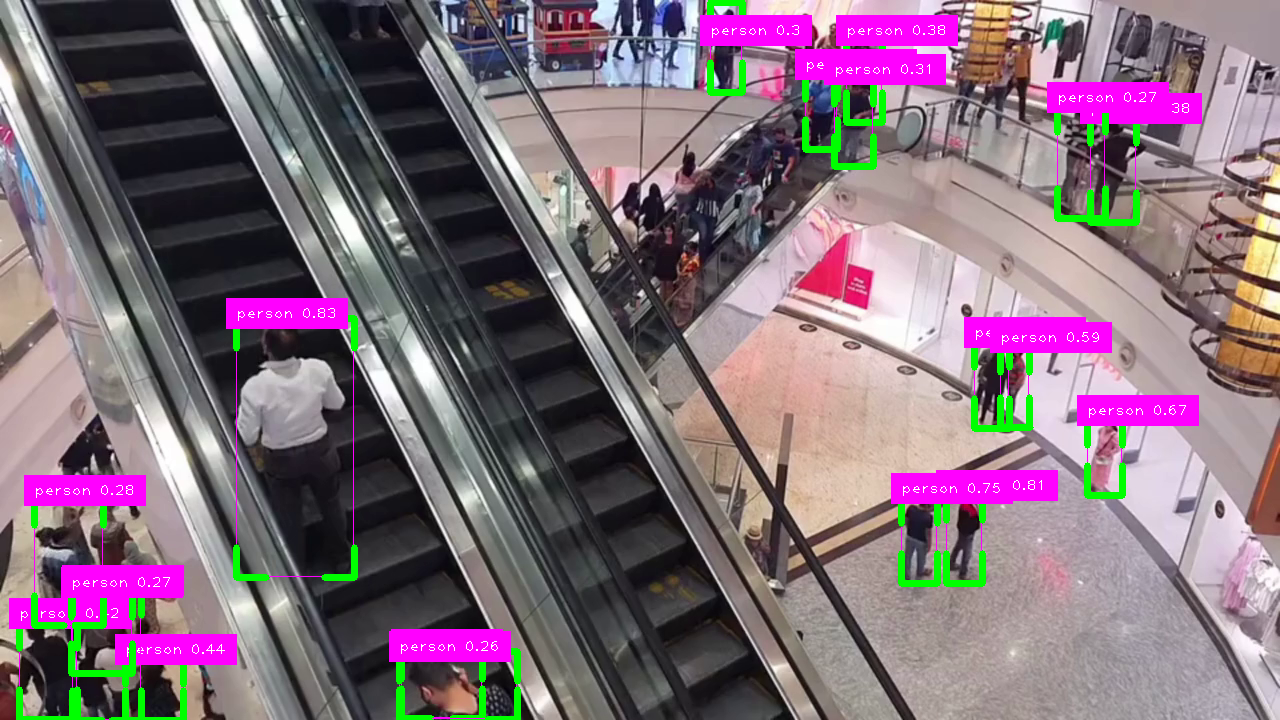


0: 384x640 19 persons, 223.3ms
Speed: 2.9ms preprocess, 223.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
FPS: 2.13233987257727


In [ ]:
from ultralytics import YOLO
import cv2
import cvzone
import math
import time
from google.colab.patches import cv2_imshow  # Import pour afficher les images dans Colab

# Charger la vidéo people.mp4
cap = cv2.VideoCapture("people.mp4")  # Assurez-vous que "people.mp4" est dans le bon chemin

# Charger le modèle YOLO
model = YOLO("Yolo-Weights/yolov8n.pt")

# Liste des classes d'objets (COCO dataset)
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"]

prev_frame_time = 0
new_frame_time = 0

while cap.isOpened():
    new_frame_time = time.time()
    success, img = cap.read()  # Lire une frame de la vidéo
    if not success:
        print("Fin de la vidéo.")
        break

    # Appliquer YOLO pour détecter les objets
    results = model(img, stream=True)
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Coordonnées de la boîte englobante
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1
            cvzone.cornerRect(img, (x1, y1, w, h))

            # Confiance
            conf = math.ceil((box.conf[0] * 100)) / 100
            # Nom de la classe
            cls = int(box.cls[0])
            cvzone.putTextRect(img, f'{classNames[cls]} {conf}', (max(0, x1), max(35, y1)), scale=1, thickness=1)

    # Calculer les FPS
    fps = 1 / (new_frame_time - prev_frame_time)
    prev_frame_time = new_frame_time
    print(f"FPS: {fps}")

    # Afficher les résultats dans Colab
    cv2_imshow(img)  # Utiliser cv2_imshow au lieu de cv2.imshow
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Appuyez sur 'q' pour arrêter
        break

cap.release()
cv2.destroyAllWindows()



0: 384x640 4 cars, 142.2ms
Speed: 3.2ms preprocess, 142.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
FPS: 5.763435746588037e-10


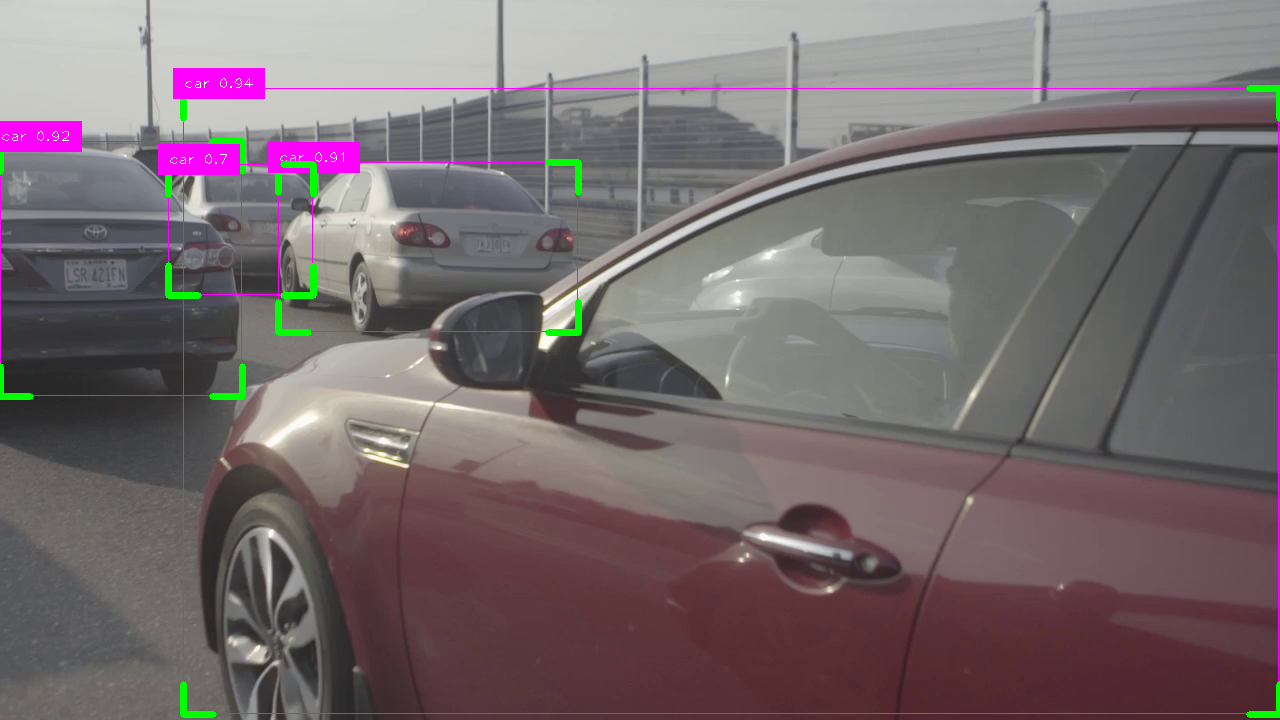


0: 384x640 4 cars, 229.4ms
Speed: 2.9ms preprocess, 229.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
FPS: 2.6381361038673505


In [ ]:
from ultralytics import YOLO
import cv2
import cvzone
import math
import time
from google.colab.patches import cv2_imshow  # Utilisé pour afficher les images dans Colab

# Charger la vidéo
cap = cv2.VideoCapture("458634_cars_lagos_traffic_19080221MarketHD53720p5000br.mp4")

# Charger le modèle YOLO
model = YOLO("Yolo-Weights/yolov8n.pt")

# Liste des classes d'objets
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"]

prev_frame_time = 0
new_frame_time = 0

while cap.isOpened():
    new_frame_time = time.time()
    success, img = cap.read()
    if not success:
        print("Fin de la vidéo.")
        break

    # Appliquer YOLO
    results = model(img, stream=True)
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Coordonnées de la boîte englobante
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1
            cvzone.cornerRect(img, (x1, y1, w, h))

            # Confiance
            conf = math.ceil((box.conf[0] * 100)) / 100
            # Nom de la classe
            cls = int(box.cls[0])
            cvzone.putTextRect(img, f'{classNames[cls]} {conf}', (max(0, x1), max(35, y1)), scale=1, thickness=1)

    # Calculer les FPS
    fps = 1 / (new_frame_time - prev_frame_time)
    prev_frame_time = new_frame_time
    print(f"FPS: {fps}")

    # Afficher les résultats dans Colab
    cv2_imshow(img)  # Utilisation de cv2_imshow pour Colab

cap.release()
